In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## Load Dataset

In [2]:
breast_cancer_data = load_breast_cancer()

In [3]:
breast_cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

#### Understanding data

In [4]:
print('Shape of the Data: ', breast_cancer_data.data.shape)

Shape of the Data:  (569, 30)


In [5]:
print('Number of Features: ', len(breast_cancer_data.feature_names))
print('List of Features: ', breast_cancer_data.feature_names)

Number of Features:  30
List of Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
print('Name of Target classes: ', breast_cancer_data.target_names)

Name of Target classes:  ['malignant' 'benign']


In [7]:
breast_cancer_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
breast_cancer_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

#### We can see that the problem is a binary classification problem

### Seeing the distribution of the data

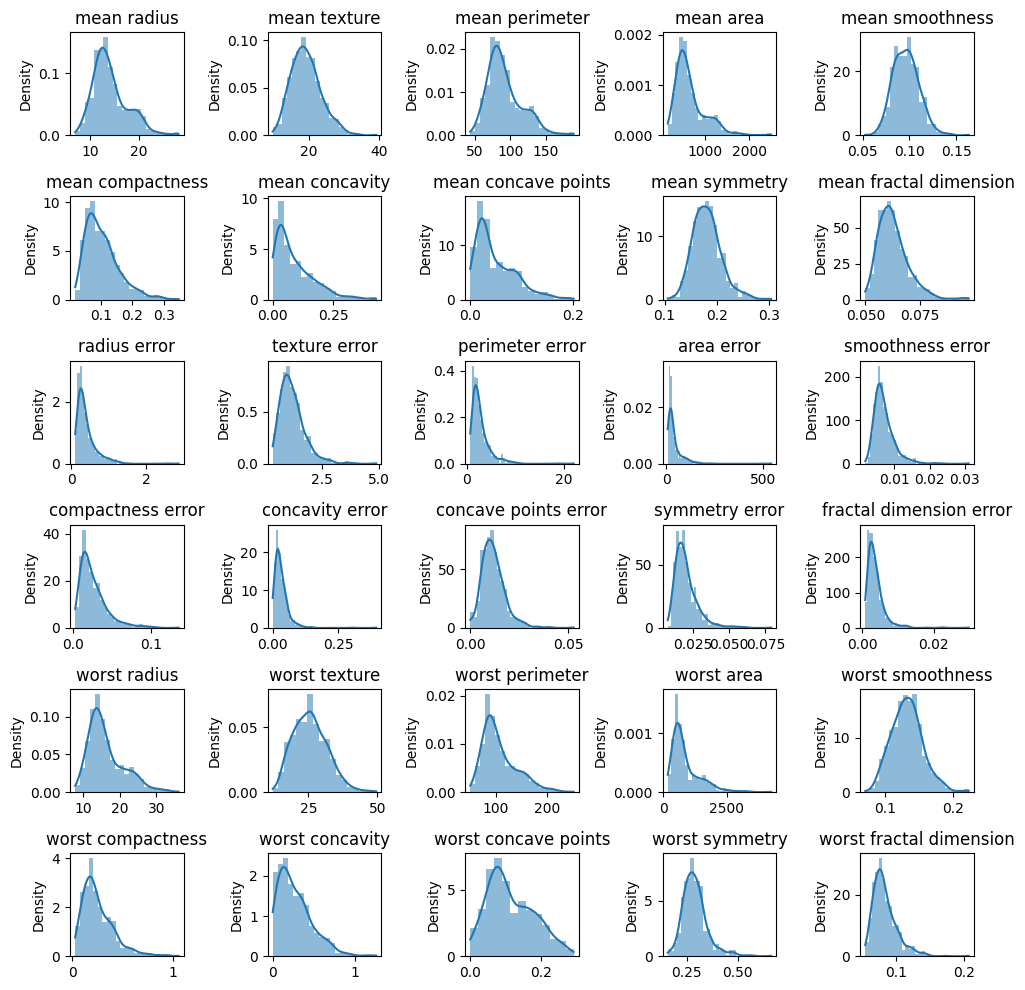

In [27]:
df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)

# Plotting
plt.figure(figsize=(10, 10))
for i, feature in enumerate(df.columns):
    plt.subplot(6, 5, i+1)
    sns.histplot(df[feature], kde=True, stat="density", linewidth=0)
    plt.title(feature)
    plt.xlabel('')
    plt.tight_layout()

plt.show()

#### We see that most of the features normal or gaussian distribution so Gaussian NB can be applied without much of feature engineering required

## Data Split and Preparation

In [9]:
# Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size=0.25, random_state=42)

In [10]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((426, 30), (426,), (143, 30), (143,))

## Model Definition

In [11]:
gaussian_nb = GaussianNB()

In [12]:
gaussian_nb.fit(X_train, y_train)

GaussianNB()

##### Accuracy on Training Data

In [13]:
train_pred = gaussian_nb.predict(X_train)

accuracy = accuracy_score(y_train, train_pred)
print(f"Prediction accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_train, train_pred)
print("Confusion Matrix:")
print(conf_matrix)

Prediction accuracy: 93.66%
Confusion Matrix:
[[139  19]
 [  8 260]]


## Results

In [14]:
y_pred = gaussian_nb.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Prediction accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Prediction accuracy: 95.80%
Confusion Matrix:
[[51  3]
 [ 3 86]]


### Trying cross validation

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [19]:
k_fold = KFold(5)  
print (cross_val_score (gaussian_nb, breast_cancer_data.data, breast_cancer_data.target.ravel() , cv=k_fold, n_jobs = 1))

[0.87719298 0.92105263 0.95614035 0.97368421 0.95575221]


# Part B - adding zero-mean Gaussian noise

In [15]:
variances = [50, 100, 200, 400, 800]
breast_cancer_data = load_breast_cancer()

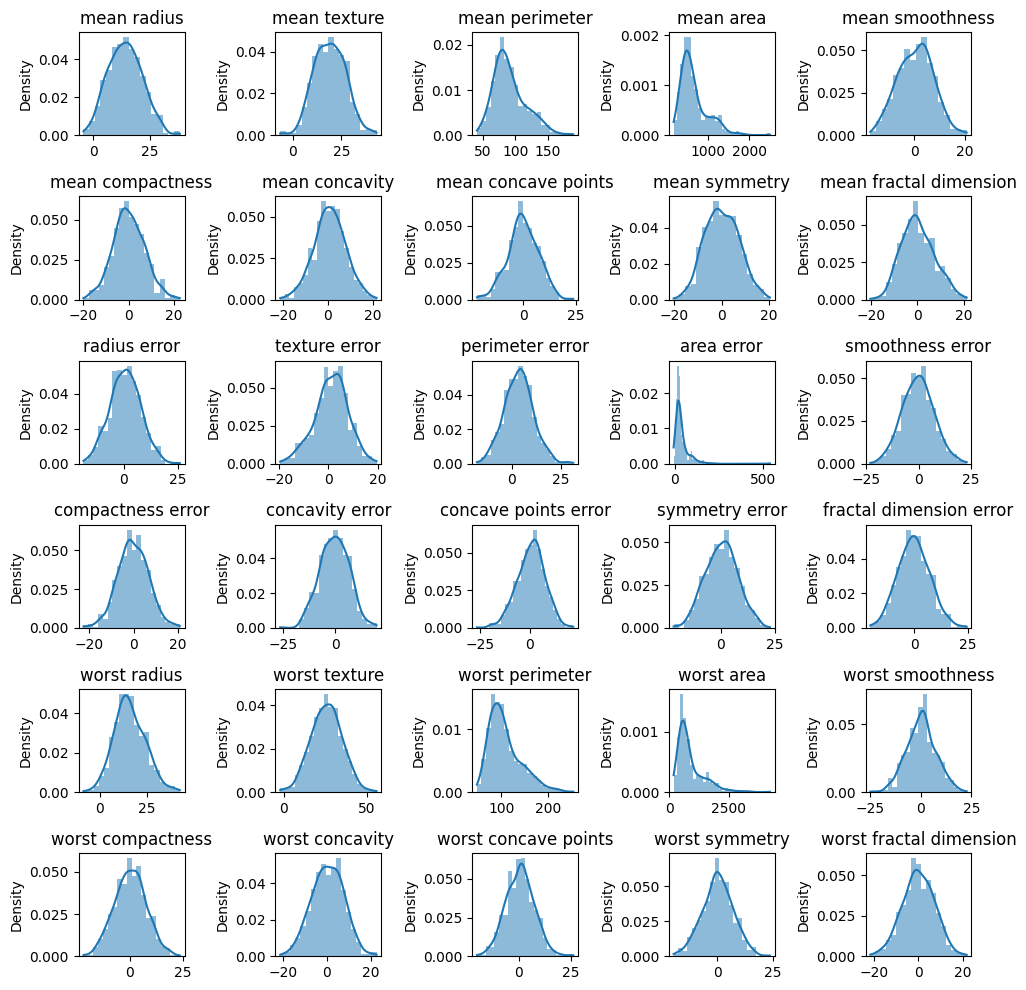

In [29]:
gaussian_noise = np.random.normal(0, np.sqrt(50), breast_cancer_data.data.shape)
X_noisy = breast_cancer_data.data + gaussian_noise
df = pd.DataFrame(X_noisy, columns=breast_cancer_data.feature_names)

# Plotting
plt.figure(figsize=(10, 10))
for i, feature in enumerate(df.columns):
    plt.subplot(6, 5, i+1)
    sns.histplot(df[feature], kde=True, stat="density", linewidth=0)
    plt.title(feature)
    plt.xlabel('')
    plt.tight_layout()

plt.show()

In [16]:
for var in variances:
    # Add Gaussian noise to the dataset
    gaussian_noise = np.random.normal(0, np.sqrt(var), breast_cancer_data.data.shape)
    X_noisy = breast_cancer_data.data + gaussian_noise
    
    # Split the dataset into training and testing sets
    X_train, X_val, y_train, y_val = train_test_split(X_noisy, breast_cancer_data.target, test_size=0.25, random_state=42)
    
    
    gaussian_nb = GaussianNB()
    gaussian_nb.fit(X_train, y_train)

    y_pred = gaussian_nb.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_pred)
    conf_matrix = confusion_matrix(y_val, y_pred)
    
    # Print the results
    print(f"Variance: {var}")
    print(f"Prediction Accuracy: {accuracy * 100:.2f}%")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")

Variance: 50
Prediction Accuracy: 95.80%
Confusion Matrix:
[[49  5]
 [ 1 88]]


Variance: 100
Prediction Accuracy: 93.71%
Confusion Matrix:
[[47  7]
 [ 2 87]]


Variance: 200
Prediction Accuracy: 93.71%
Confusion Matrix:
[[47  7]
 [ 2 87]]


Variance: 400
Prediction Accuracy: 93.01%
Confusion Matrix:
[[46  8]
 [ 2 87]]


Variance: 800
Prediction Accuracy: 93.01%
Confusion Matrix:
[[46  8]
 [ 2 87]]


